In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets


In [2]:
# loading data from leads_basic_details.csv
df1 = pd.read_csv('/Users/agampreetsingh/Downloads/archive (1)/leads_basic_details.csv')
df2 = pd.read_csv('/Users/agampreetsingh/Downloads/archive (1)/leads_demo_watched_details.csv')
df3 = pd.read_csv('/Users/agampreetsingh/Downloads/archive (1)/leads_interaction_details.csv')
df4 = pd.read_csv('/Users/agampreetsingh/Downloads/archive (1)/leads_reasons_for_no_interest.csv')
df5 = pd.read_csv('/Users/agampreetsingh/Downloads/archive (1)/sales_managers_assigned_leads_details.csv')

# Data Cleaning and Handling

In [3]:
print('SHAPE OF DATASETS \n')
print('leads_basic_details: ', df1.shape)
print('leads_demo_watched_details', df2.shape)
print('leads_interaction_details', df3.shape)
print('leads_reasons_for_no_interest', df4.shape)
print('sales_managers_assigned_leads_details', df5.shape)

SHAPE OF DATASETS 



leads_basic_details:  (360, 7)

leads_demo_watched_details (194, 4)

leads_interaction_details (2192, 6)

leads_reasons_for_no_interest (294, 4)

sales_managers_assigned_leads_details (360, 5)


In [4]:
print('DUPLICATES COUNT \n')
print('leads_basic_details: ', df1.duplicated().sum())
print('leads_demo_watched_details: ', df2.duplicated().sum())
print('leads_interaction_details: ', df3.duplicated().sum())
print('leads_reasons_for_no_interest: ', df4.duplicated().sum())
print('sales_managers_assigned_leads_details: ', df5.duplicated().sum())

DUPLICATES COUNT 



leads_basic_details:  0

leads_demo_watched_details:  0

leads_interaction_details:  438

leads_reasons_for_no_interest:  0

sales_managers_assigned_leads_details:  0


- We Notice that there are duplicate records in leads_interaction_details dataset. 
- We need to drop these records before using the data for analysis.


In [5]:
df3.drop_duplicates(inplace=True)
print('leads_interaction_details: ', df3.duplicated().sum())

leads_interaction_details:  0


In [6]:
print('NULL VALUE COUNT\n')
print('leads_basic_details:\n\n', df1.isnull().sum())
print('leads_demo_watched_details:\n\n', df2.isnull().sum())
print('leads_interaction_details:\n\n', df3.isnull().sum())
print('leads_reasons_for_no_interest:\n\n', df4.isnull().sum())
print('sales_managers_assigned_leads_details:\n\n', df5.isnull().sum())

NULL VALUE COUNT



leads_basic_details:



 lead_id              0

age                  0

gender               0

current_city         0

current_education    0

parent_occupation    0

lead_gen_source      0

dtype: int64

leads_demo_watched_details:



 lead_id               0

demo_watched_date     0

language              0

watched_percentage    0

dtype: int64

leads_interaction_details:



 jnr_sm_id         0

lead_id           0

lead_stage        0

call_done_date    0

call_status       0

call_reason       0

dtype: int64

leads_reasons_for_no_interest:



 lead_id                                     0

reasons_for_not_interested_in_demo        130

reasons_for_not_interested_to_consider    215

reasons_for_not_interested_to_convert     243

dtype: int64

sales_managers_assigned_leads_details:



 snr_sm_id        0

jnr_sm_id        0

assigned_date    0

cycle            0

lead_id          0

dtype: int64


- Now we start looking for null values, duplicates, outliers and inconsistencies in the data etc.
- We start working on each dataset from df1 through df5

### Dataframe df1

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 360 entries, 0 to 359

Data columns (total 7 columns):

 #   Column             Non-Null Count  Dtype 

---  ------             --------------  ----- 

 0   lead_id            360 non-null    object

 1   age                360 non-null    int64 

 2   gender             360 non-null    object

 3   current_city       360 non-null    object

 4   current_education  360 non-null    object

 5   parent_occupation  360 non-null    object

 6   lead_gen_source    360 non-null    object

dtypes: int64(1), object(6)

memory usage: 19.8+ KB


In [8]:
df1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


- We observe there is huge gap between the 75% value and the max value. 211 years of age is an unrealistic number and appears to be an outlier. Let us plot it and verify.

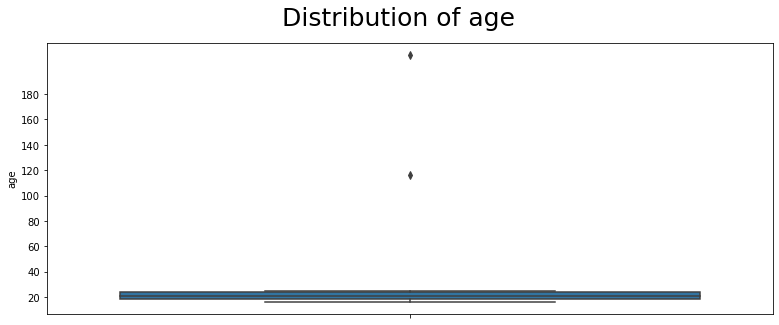

In [9]:
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of age", fontsize= 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df1.age)

plt.show()

- We notice that there is not one but two outliers. It is necessary to remove these outliers before this data can be used for further analysis.

In [10]:
# Seperating values greater than 90 percentile as outliers and storing into a different dataset. 
df1_outlier = df1[df1.age>df1.age.quantile(0.90)]
# Displaying the outliers
df1_outlier

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [11]:
# Removing the outliers for df1 dataset
df1 = df1.drop([df1_outlier.index[0] , df1_outlier.index[1]])

In [12]:
df1.shape

(358, 7)

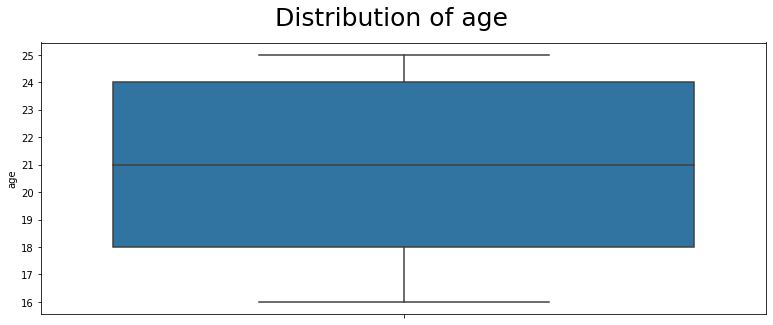

In [13]:
# Re-plotting age distribution after handling the outliers
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of age", fontsize= 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,40,1)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df1.age)
plt.show()

- We now observe that outliers are no longer present in df1 data.
- Majority of the students are aged between 18 and 24 years.

In [14]:
df1.gender.value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

In [15]:
df1.columns

Index(['lead_id', 'age', 'gender', 'current_city', 'current_education',
       'parent_occupation', 'lead_gen_source'],
      dtype='object')

In [16]:
df1.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

 - We notice that 'Intermediate' and 'Intermediate Completed' are inferred the same way. 
 - We therefore rename one of these values to draw more accurate results in our analysis further.

In [17]:
df1['current_education'].replace({'Intermediate Completed':'Intermediate'}, inplace=True)

### Dataframe df2

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 194 entries, 0 to 193

Data columns (total 4 columns):

 #   Column              Non-Null Count  Dtype 

---  ------              --------------  ----- 

 0   lead_id             194 non-null    object

 1   demo_watched_date   194 non-null    object

 2   language            194 non-null    object

 3   watched_percentage  194 non-null    int64 

dtypes: int64(1), object(3)

memory usage: 6.2+ KB


In [19]:
df2.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


- We observe that the max watched_percentage is beyond 100 which is inaccurate or unrealistic. Let us plot the same and observe the outliers in this field.

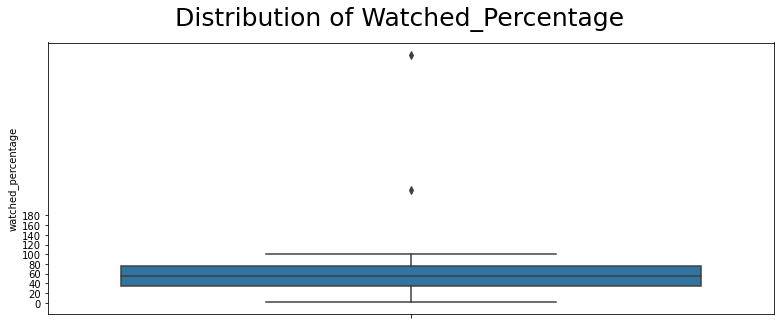

In [20]:
# Plotting Watched Percentage
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Watched_Percentage", fontsize= 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df2.watched_percentage)

plt.show()

- We notice that there are not one but two outliers that are beyond the 100%. These outliers must be removed from teh dataset to normalize the data and be used for analysis.

In [21]:
# Identifying outliers whose watched percentage is beyond 100
df2_outlier = df2[df2.watched_percentage>100]
df2_outlier

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [22]:
# Removing the outliers from df2 dataset
df2 = df2.drop([df2_outlier.index[0] , df2_outlier.index[1]])
df2.shape

(192, 4)

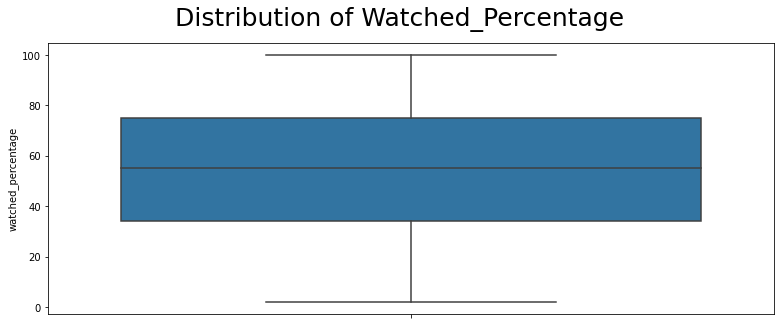

In [23]:
# Plotting watched percentage after handling outliers
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Watched_Percentage", fontsize= 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df2.watched_percentage)

plt.show()

In [24]:
df2 = df2.drop(['demo_watched_date'], axis=1)

In [25]:
df2

,lead_id,language,watched_percentage
0,USR1002,Telugu,42
1,USR1003,Telugu,81
2,USR1004,Telugu,35
3,USR1005,Hindi,38
4,USR1006,Hindi,54
...,...,...,...
189,USR1317,English,48
190,USR1318,English,83
191,USR1319,English,84
192,USR1343,English,68


### Dataframe df3

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1754 entries, 0 to 2191

Data columns (total 6 columns):

 #   Column          Non-Null Count  Dtype 

---  ------          --------------  ----- 

 0   jnr_sm_id       1754 non-null   object

 1   lead_id         1754 non-null   object

 2   lead_stage      1754 non-null   object

 3   call_done_date  1754 non-null   object

 4   call_status     1754 non-null   object

 5   call_reason     1754 non-null   object

dtypes: object(6)

memory usage: 95.9+ KB


In [27]:
df3 = df3.drop(['call_done_date'], axis=1)
df3.head()

,jnr_sm_id,lead_id,lead_stage,call_status,call_reason
0,JNR1001MG,USR1001,lead,successful,lead_introduction
1,JNR1001MG,USR1001,lead,successful,demo_schedule
2,JNR1001MG,USR1002,lead,successful,lead_introduction
3,JNR1001MG,USR1002,lead,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,successful,post_demo_followup


In [28]:
#Identify and drop duplicates
print(df3.duplicated().sum())
df3.drop_duplicates(inplace=True)

11


In [29]:
# Renaming the stages according the the last stage each lead was in.
df3['lead_stage'].replace({'lead':'Lead Stage','lead-awareness': 'Awareness Stage', 'lead-awareness-consideration':'Consideration Stage', 'lead-awareness-consideration-conversion':'Conversion Stage' }, inplace=True)


In [30]:
#Verifying count of leads in each stage
df3.lead_stage.value_counts()

Lead Stage       1196
consideration     254
awareness         229
conversion         64
Name: lead_stage, dtype: int64

### Dataframe df4

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 294 entries, 0 to 293

Data columns (total 4 columns):

 #   Column                                  Non-Null Count  Dtype 

---  ------                                  --------------  ----- 

 0   lead_id                                 294 non-null    object

 1   reasons_for_not_interested_in_demo      164 non-null    object

 2   reasons_for_not_interested_to_consider  79 non-null     object

 3   reasons_for_not_interested_to_convert   51 non-null     object

dtypes: object(4)

memory usage: 9.3+ KB


- Observe that the leads_reasons_for_no_interest dataset has null values in its columns.
- Up on observation, we notice that these coumns in the dataset are all speaking of the reason why the lead did not show interest at any given stage.
- In this scenario, it is advisable to combine the values of these three columns into a single column named 'reason_for_not_interested' and carry out further analysis.

In [32]:
# Replacing Null values with an empty string
df4['reasons_for_not_interested_in_demo'] = df4['reasons_for_not_interested_in_demo'].fillna('')
df4['reasons_for_not_interested_to_consider'] = df4['reasons_for_not_interested_to_consider'].fillna('')
df4['reasons_for_not_interested_to_convert'] = df4['reasons_for_not_interested_to_convert'].fillna('')

In [33]:
# Combine all the values in the existing columns and store them in the new column.
df4['Reason_for_not_interested'] = df4['reasons_for_not_interested_in_demo'] + df4['reasons_for_not_interested_to_consider'] + df4['reasons_for_not_interested_to_convert']

In [34]:
# Drop the redundant columns that are no longer required for analysis
df4 = df4.drop(['reasons_for_not_interested_in_demo','reasons_for_not_interested_to_consider', 'reasons_for_not_interested_to_convert'], axis=1)

In [35]:
# Now leads_reasons_for_no_interest will be having 'lead_id' and 'Reason_for_not_interested' in its dataset that can be used for further analysis.
df4.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 294 entries, 0 to 293

Data columns (total 2 columns):

 #   Column                     Non-Null Count  Dtype 

---  ------                     --------------  ----- 

 0   lead_id                    294 non-null    object

 1   Reason_for_not_interested  294 non-null    object

dtypes: object(2)

memory usage: 4.7+ KB


In [36]:
df4.Reason_for_not_interested.value_counts()

Can't afford                        95
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Cannot afford                        4
Name: Reason_for_not_interested, dtype: int64

- We notice that there are two values in 'Reason_for_not_interested' column that mean the same.
- One is 'Can't afford' and another is 'Cannot afford'
- We shall rename one of these values for more accurate results.

In [37]:
df4['Reason_for_not_interested'].replace({"Can't afford":'Cannot afford'}, inplace=True)

### Dataframe df5

In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 360 entries, 0 to 359

Data columns (total 5 columns):

 #   Column         Non-Null Count  Dtype 

---  ------         --------------  ----- 

 0   snr_sm_id      360 non-null    object

 1   jnr_sm_id      360 non-null    object

 2   assigned_date  360 non-null    object

 3   cycle          360 non-null    int64 

 4   lead_id        360 non-null    object

dtypes: int64(1), object(4)

memory usage: 14.2+ KB


In [39]:
df5 = df5.drop(['assigned_date'], axis=1)
df5.shape

(360, 4)

In [40]:
# Removing the outliers identified in df1 and df2 from df5
df5 = df5.drop([df1_outlier.index[0] , df1_outlier.index[1], df2_outlier.index[0] , df2_outlier.index[1]])

In [41]:
print('SHAPE OF DATASETS \n')
print('leads_basic_details: ', df1.shape)
print('leads_demo_watched_details', df2.shape)
print('leads_interaction_details', df3.shape)
print('leads_reasons_for_no_interest', df4.shape)
print('sales_managers_assigned_leads_details', df5.shape)

SHAPE OF DATASETS 



leads_basic_details:  (358, 7)

leads_demo_watched_details (192, 3)

leads_interaction_details (1743, 5)

leads_reasons_for_no_interest (294, 2)

sales_managers_assigned_leads_details (356, 4)


In [42]:
L1 = pd.merge(df1,df3)
L1.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1734 entries, 0 to 1733

Data columns (total 11 columns):

 #   Column             Non-Null Count  Dtype 

---  ------             --------------  ----- 

 0   lead_id            1734 non-null   object

 1   age                1734 non-null   int64 

 2   gender             1734 non-null   object

 3   current_city       1734 non-null   object

 4   current_education  1734 non-null   object

 5   parent_occupation  1734 non-null   object

 6   lead_gen_source    1734 non-null   object

 7   jnr_sm_id          1734 non-null   object

 8   lead_stage         1734 non-null   object

 9   call_status        1734 non-null   object

 10  call_reason        1734 non-null   object

dtypes: int64(1), object(10)

memory usage: 162.6+ KB


In [43]:
L2 = pd.merge(L1,df5)
L2.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1726 entries, 0 to 1725

Data columns (total 13 columns):

 #   Column             Non-Null Count  Dtype 

---  ------             --------------  ----- 

 0   lead_id            1726 non-null   object

 1   age                1726 non-null   int64 

 2   gender             1726 non-null   object

 3   current_city       1726 non-null   object

 4   current_education  1726 non-null   object

 5   parent_occupation  1726 non-null   object

 6   lead_gen_source    1726 non-null   object

 7   jnr_sm_id          1726 non-null   object

 8   lead_stage         1726 non-null   object

 9   call_status        1726 non-null   object

 10  call_reason        1726 non-null   object

 11  snr_sm_id          1726 non-null   object

 12  cycle              1726 non-null   int64 

dtypes: int64(2), object(11)

memory usage: 188.8+ KB


In [44]:
L3 = pd.merge(L2, df4, how = 'left', on='lead_id')
L3.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1726 entries, 0 to 1725

Data columns (total 14 columns):

 #   Column                     Non-Null Count  Dtype 

---  ------                     --------------  ----- 

 0   lead_id                    1726 non-null   object

 1   age                        1726 non-null   int64 

 2   gender                     1726 non-null   object

 3   current_city               1726 non-null   object

 4   current_education          1726 non-null   object

 5   parent_occupation          1726 non-null   object

 6   lead_gen_source            1726 non-null   object

 7   jnr_sm_id                  1726 non-null   object

 8   lead_stage                 1726 non-null   object

 9   call_status                1726 non-null   object

 10  call_reason                1726 non-null   object

 11  snr_sm_id                  1726 non-null   object

 12  cycle                      1726 non-null   int64 

 13  Reason_for_not_interested  1205 non-null   ob

In [45]:
L3['Reason_for_not_interested'] = L3['Reason_for_not_interested'].fillna('Shown Interest')

In [46]:
L3.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1726 entries, 0 to 1725

Data columns (total 14 columns):

 #   Column                     Non-Null Count  Dtype 

---  ------                     --------------  ----- 

 0   lead_id                    1726 non-null   object

 1   age                        1726 non-null   int64 

 2   gender                     1726 non-null   object

 3   current_city               1726 non-null   object

 4   current_education          1726 non-null   object

 5   parent_occupation          1726 non-null   object

 6   lead_gen_source            1726 non-null   object

 7   jnr_sm_id                  1726 non-null   object

 8   lead_stage                 1726 non-null   object

 9   call_status                1726 non-null   object

 10  call_reason                1726 non-null   object

 11  snr_sm_id                  1726 non-null   object

 12  cycle                      1726 non-null   int64 

 13  Reason_for_not_interested  1726 non-null   ob

In [47]:
L4 = pd.merge(L3,df2,how='left',on='lead_id')
L4.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1726 entries, 0 to 1725

Data columns (total 16 columns):

 #   Column                     Non-Null Count  Dtype  

---  ------                     --------------  -----  

 0   lead_id                    1726 non-null   object 

 1   age                        1726 non-null   int64  

 2   gender                     1726 non-null   object 

 3   current_city               1726 non-null   object 

 4   current_education          1726 non-null   object 

 5   parent_occupation          1726 non-null   object 

 6   lead_gen_source            1726 non-null   object 

 7   jnr_sm_id                  1726 non-null   object 

 8   lead_stage                 1726 non-null   object 

 9   call_status                1726 non-null   object 

 10  call_reason                1726 non-null   object 

 11  snr_sm_id                  1726 non-null   object 

 12  cycle                      1726 non-null   int64  

 13  Reason_for_not_interested  172

In [48]:
L4['language'] = L4['language'].fillna('Info Unavailable')

In [49]:
L4['watched_percentage'] = L4['watched_percentage'].fillna('0')

In [50]:
L4.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1726 entries, 0 to 1725

Data columns (total 16 columns):

 #   Column                     Non-Null Count  Dtype 

---  ------                     --------------  ----- 

 0   lead_id                    1726 non-null   object

 1   age                        1726 non-null   int64 

 2   gender                     1726 non-null   object

 3   current_city               1726 non-null   object

 4   current_education          1726 non-null   object

 5   parent_occupation          1726 non-null   object

 6   lead_gen_source            1726 non-null   object

 7   jnr_sm_id                  1726 non-null   object

 8   lead_stage                 1726 non-null   object

 9   call_status                1726 non-null   object

 10  call_reason                1726 non-null   object

 11  snr_sm_id                  1726 non-null   object

 12  cycle                      1726 non-null   int64 

 13  Reason_for_not_interested  1726 non-null   ob

In [51]:
L4.duplicated().sum()

0

In [52]:
L4['Lead_Status'] = np.where(L4['lead_stage'] == 'Conversion Stage', 'Converted Lead', 'Yet to convert Lead')

In [53]:
L4.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_status,call_reason,snr_sm_id,cycle,Reason_for_not_interested,language,watched_percentage,Lead_Status
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,Lead Stage,successful,lead_introduction,SNR501MG,1,No time for student,Info Unavailable,0,Yet to convert Lead
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,Lead Stage,successful,demo_schedule,SNR501MG,1,No time for student,Info Unavailable,0,Yet to convert Lead
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,Lead Stage,successful,lead_introduction,SNR501MG,1,Shown Interest,Telugu,42.0,Yet to convert Lead
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,Lead Stage,successful,demo_schedule,SNR501MG,1,Shown Interest,Telugu,42.0,Yet to convert Lead
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,successful,post_demo_followup,SNR501MG,1,Shown Interest,Telugu,42.0,Yet to convert Lead


# Analysis

Text(3.674999999999997, 0.5, 'No of Leads')

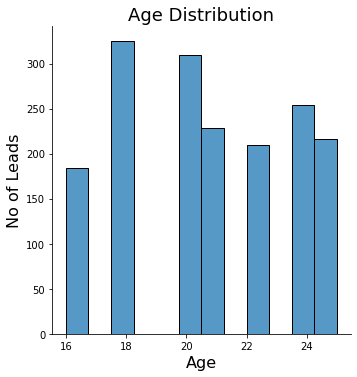

In [54]:
sns.displot(L4["age"],palette="Blues_d")
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('No of Leads', fontsize=16)


#### From the above plot we can observe that maximum no leads are 18 to 20 years old.

FEMALE    985
MALE      741
Name: gender, dtype: int64

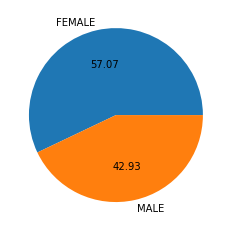

In [55]:
ax = L4.groupby('gender').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
L4["gender"].value_counts()

#### From the pie chart mentioned above we incure there are more number of female leads than male leads.

Text(0.5, 1.0, 'Current Education')

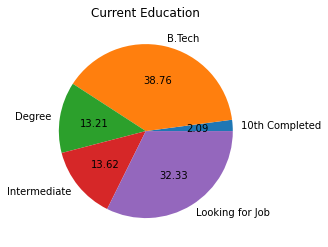

In [56]:
ax = L4.groupby('current_education').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Current Education")

#### From the above chart we observe majority of leads are pursuing higher education or are in search of job.

Text(0.5, 1.0, 'Lead Source')

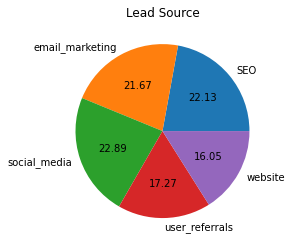

In [57]:
ax = L4.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Lead Source")


#### Around 24% of the leads came to know about the firm through social media. Other major sources contributing are SEO and email_marketing which contribute around 20% each.

Text(10.049999999999997, 0.5, 'No of Leads watching video')

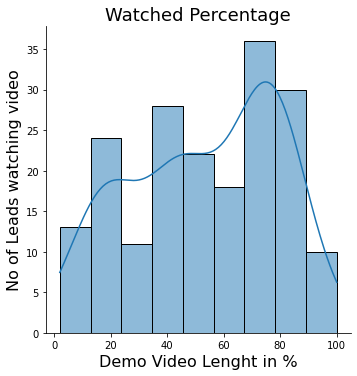

In [58]:
sns.displot(df2.watched_percentage,palette="Blues_d",kde=True)
plt.title('Watched Percentage', fontsize=18)
plt.xlabel('Demo Video Lenght in %', fontsize=16)
plt.ylabel('No of Leads watching video', fontsize=16)

#### From the above graph we can say more than 35 leads watched around 70-80% of the video. Around 10 leads watched the whole demo video.Through analysing the curve we can say majority of the leads population watch demo video over 40%

In [59]:
merged_leads_demo = pd.merge(df2, df1, how='inner', on = 'lead_id')
merged_leads_demo .head(5)

,lead_id,language,watched_percentage,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1002,Telugu,42,20,MALE,Bengaluru,B.Tech,Business,user_referrals
1,USR1003,Telugu,81,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,Telugu,35,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,Hindi,38,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,Hindi,54,16,MALE,Kochi,Intermediate,Doctor,user_referrals


In [60]:
merged_leads_demo.groupby(['language', 'current_city']).size()

language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

#### English language is dominant while Telugu is majorly being used in Hyderabad and Vishakapatnam

Text(0.5, 1.0, 'Demo Language')

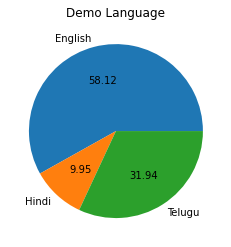

In [61]:
ax = merged_leads_demo.groupby('language').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Demo Language")

#### From the above pie we can conclude around 58% of customers prefer watching Demo Video in English making it the major language. Around 32% of the leads population prefer watching Demo in Telegu and the remaining 10% prefer Hindi.

In [62]:
merged_interaction_demo = pd.merge(df2, df3, how='inner', on = 'lead_id')
merged_interaction_demo

,lead_id,language,watched_percentage,jnr_sm_id,lead_stage,call_status,call_reason
0,USR1002,Telugu,42,JNR1001MG,Lead Stage,successful,lead_introduction
1,USR1002,Telugu,42,JNR1001MG,Lead Stage,successful,demo_schedule
2,USR1002,Telugu,42,JNR1001MG,awareness,successful,post_demo_followup
3,USR1002,Telugu,42,JNR1001MG,awareness,successful,followup_for_consideration
4,USR1002,Telugu,42,JNR1001MG,consideration,successful,interested_for_conversion
...,...,...,...,...,...,...,...
1227,USR1348,English,72,JNR1012MG,Lead Stage,successful,demo_not_attended
1228,USR1348,English,72,JNR1012MG,awareness,successful,post_demo_followup
1229,USR1348,English,72,JNR1012MG,awareness,successful,followup_for_consideration
1230,USR1348,English,72,JNR1012MG,consideration,successful,followup_for_conversion


In [63]:
merged_interaction_demo.groupby([ 'call_status','call_reason']).size()

call_status   call_reason               
successful    demo_not_attended             155
              demo_schedule                 192
              followup_for_consideration     30
              followup_for_conversion       101
              interested_for_conversion     113
              lead_introduction             192
              post_demo_followup            192
              successful_conversion          63
unsuccessful  demo_not_attended              45
              demo_schedule                  15
              followup_for_consideration      5
              followup_for_conversion        19
              interested_for_conversion      18
              lead_introduction              92
dtype: int64

#### Sales managers require to focus on earlier stages of acquisition process. Work needs to be done at the primary stages to imbibe curiosity among the leads to watch Demo Videos



In [64]:
 df4.describe()

,lead_id,Reason_for_not_interested
count,294,294
unique,294,5
top,USR1001,Cannot afford
freq,1,99


#### From the above table it can be observed that There are 5 unique reasons for students not being interested of which the major reason is the users can't afford. Major reasons for leads dropping out are because of affordibility issues.

In [65]:
df5.groupby([ 'snr_sm_id','jnr_sm_id']).size()

snr_sm_id  jnr_sm_id
SNR501MG   JNR1001MG    33
           JNR1002MG    20
           JNR1003MG    20
           JNR1004MG    20
SNR502MG   JNR1005MG    19
           JNR1006MG    20
           JNR1007MG    19
           JNR1008MG    20
SNR503MG   JNR1009MG    20
           JNR1010MG    21
           JNR1011MG    26
           JNR1012MG    31
SNR504MG   JNR1013MG    20
           JNR1014MG    20
           JNR1015MG    21
           JNR1016MG    26
dtype: int64

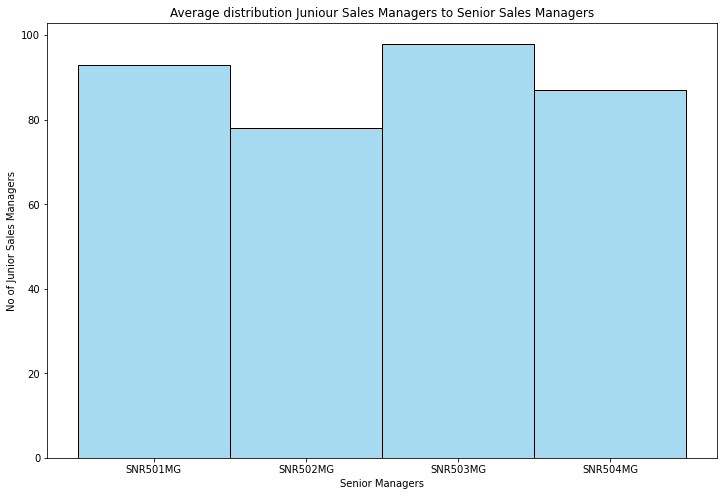

In [66]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.histplot(data=df5["snr_sm_id"],bins=4,color="skyblue")
ax.set(title="Average distribution Juniour Sales Managers to Senior Sales Managers",ylabel="No of Junior Sales Managers",xlabel="Senior Managers");

#### Number of Junior Sales Managers are almost evenly assigned among Senior Sales Managers. Here we have total of 4 senior Managers



In [67]:
#percentage of leads acquired 

acquired_leads=L4.query('call_reason == "successful_conversion"')['lead_id'].nunique()
acquired_leads

64

In [68]:
total_no_of_leads=L4.lead_id.nunique()
total_no_of_leads

354

In [69]:
percent_of_leads_acquired=acquired_leads/total_no_of_leads*100
print(percent_of_leads_acquired)

18.07909604519774


Text(0.5, 1.0, 'Percentage of Leads')

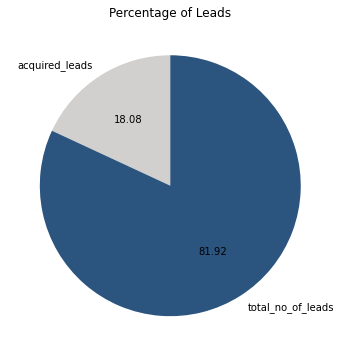

In [70]:
no_of_leads_acquired=np.array([acquired_leads, total_no_of_leads-acquired_leads])
ig,ax=plt.subplots(figsize=(12,6))
ax.pie(no_of_leads_acquired,labels=["acquired_leads","total_no_of_leads"],autopct='%.2f',colors=["#D1D0CE", "#2B547E"],startangle=90)
ax.set_title("Percentage of Leads")

#### Approximately 18.08% ie around 18% of customer acquisition is successfully done by the team

